In [2]:
import pandas as pd

1. Data Understanding and Summary Statistics

Question 1: Load the dataset into a pandas DataFrame. Display the first 10 rows of the dataset. Describe the dataset by listing all the columns and their data types.

In [3]:
df = pd.read_excel('eda_inventory_dataset_batch1.xlsx')

In [4]:
df.head(10)

,Product_ID,Product_Name,Category,Supplier,Purchase_Price,Sale_Price,Quantity_In_Stock,Reorder_Level,Units_On_Order,Discontinued
0,P0001,Doodad,Clothing,Supplier D,339.75,NaN,588.0,292.0,161.0,1
1,P0002,Doohickey,Clothing,Supplier C,NaN,470.14,348.0,114.0,70.0,1
2,P0003,Thingamajig,Clothing,Supplier B,NaN,460.10,146.0,NaN,163.0,1
3,P0004,Doohickey,Clothing,Supplier A,NaN,124.82,66.0,13.0,NaN,0
4,P0005,Doohickey,Toys,Supplier E,228.75,66.71,903.0,271.0,37.0,1
5,P0006,Gadget,Toys,Supplier E,401.21,NaN,519.0,89.0,NaN,0
6,P0007,Thingamajig,Furniture,Supplier A,412.99,230.48,NaN,215.0,136.0,1
7,P0008,Thingamajig,Electronics,Supplier A,430.21,267.92,339.0,444.0,199.0,1
8,P0009,Thingamajig,Clothing,Supplier B,NaN,33.22,174.0,278.0,178.0,0
9,P0010,Doohickey,Furniture,Supplier C,221.18,166.85,899.0,447.0,34.0,1


In [5]:
df.dtypes

Product_ID            object
Product_Name          object
Category              object
Supplier              object
Purchase_Price       float64
Sale_Price           float64
Quantity_In_Stock    float64
Reorder_Level        float64
Units_On_Order       float64
Discontinued           int64
dtype: object

Question 2: Calculate and display the summary statistics (mean, median, mode, standard deviation, etc.) for all numeric columns in the dataset. Identify any insights from these summary statistics.

In [6]:
summary = df.describe(include='number')
summary

,Purchase_Price,Sale_Price,Quantity_In_Stock,Reorder_Level,Units_On_Order,Discontinued
count,801.000000,810.000000,896.000000,915.000000,902.000000,1000.000000
mean,251.924732,360.687049,490.196429,246.031694,97.648559,0.508000
std,140.640863,475.752708,291.169649,143.636135,57.119825,0.500186
min,10.010000,15.020000,0.000000,1.000000,0.000000,0.000000
25%,134.020000,154.667500,224.000000,120.000000,48.250000,0.000000
50%,253.790000,313.475000,497.000000,246.000000,96.000000,1.000000
75%,370.900000,460.060000,734.250000,371.000000,147.000000,1.000000
max,498.930000,4967.800000,998.000000,498.000000,199.000000,1.000000


In [7]:
mid = df.median(numeric_only = True)
mid

Purchase_Price       253.790
Sale_Price           313.475
Quantity_In_Stock    497.000
Reorder_Level        246.000
Units_On_Order        96.000
Discontinued           1.000
dtype: float64

In [8]:
modes = df.mode(numeric_only=True).iloc[0]
modes

Purchase_Price        47.72
Sale_Price           255.55
Quantity_In_Stock      0.00
Reorder_Level         19.00
Units_On_Order        68.00
Discontinued           1.00
Name: 0, dtype: float64

In [9]:
std_deviate = df.std(numeric_only=True)
std_deviate

Purchase_Price       140.640863
Sale_Price           475.752708
Quantity_In_Stock    291.169649
Reorder_Level        143.636135
Units_On_Order        57.119825
Discontinued           0.500186
dtype: float64

In [10]:
varn = df.var(numeric_only = True)
varn

Purchase_Price        19779.852242
Sale_Price           226340.639169
Quantity_In_Stock     84779.764725
Reorder_Level         20631.339257
Units_On_Order         3262.674354
Discontinued              0.250186
dtype: float64

Question 3: Identify any columns that have missing values. Calculate the percentage of missing values in each of these columns.

In [11]:
missing_sum = df.isnull().sum()
missing_percent=(missing_sum / len(df))*100
missing_percent

Product_ID            0.0
Product_Name          0.0
Category              0.0
Supplier              0.0
Purchase_Price       19.9
Sale_Price           19.0
Quantity_In_Stock    10.4
Reorder_Level         8.5
Units_On_Order        9.8
Discontinued          0.0
dtype: float64

In [12]:
missing_summary = pd.DataFrame({
    'Missing Values': missing_sum,
    'Percentage': missing_percent
})
missing_summary

,Missing Values,Percentage
Product_ID,0,0.0
Product_Name,0,0.0
Category,0,0.0
Supplier,0,0.0
Purchase_Price,199,19.9
Sale_Price,190,19.0
Quantity_In_Stock,104,10.4
Reorder_Level,85,8.5
Units_On_Order,98,9.8
Discontinued,0,0.0


In [13]:
missing_summary[missing_summary['Missing Values'] > 0]

,Missing Values,Percentage
Purchase_Price,199,19.9
Sale_Price,190,19.0
Quantity_In_Stock,104,10.4
Reorder_Level,85,8.5
Units_On_Order,98,9.8


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

2. Data Visualization 

Question 4: Create a histogram for the 'Sale_Price' column. What can you infer about the distribution of sale prices in the dataset?

In [15]:
plt.figure(figsize=(10,6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

c:\Users\Miruthulasri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Sale_Price', ylabel='Count'>

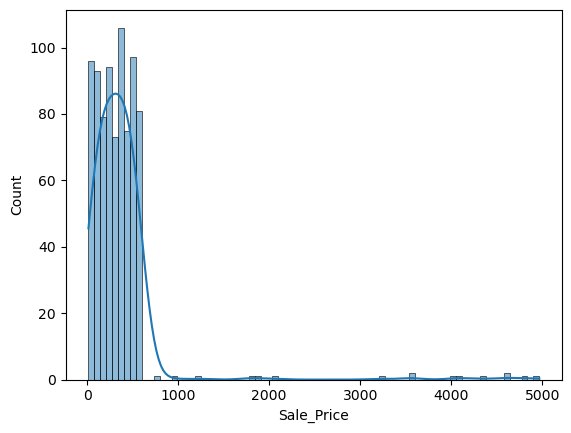

In [16]:
sns.histplot(df['Sale_Price'], kde=True)

Question 5: Generate a box plot for the 'Quantity_In_Stock' column. Identify any outliers and describe how they could affect the analysis.

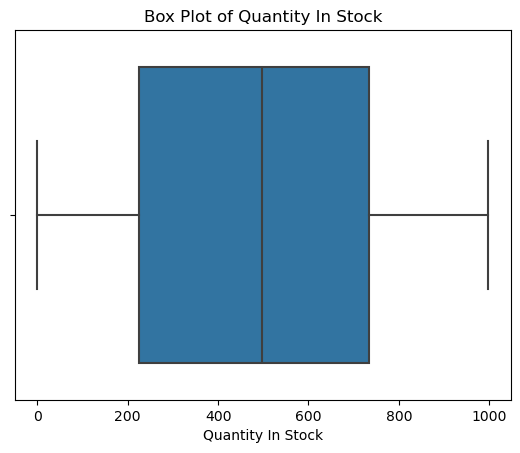

In [17]:
sns.boxplot(x=df['Quantity_In_Stock'])
plt.title('Box Plot of Quantity In Stock')
plt.xlabel('Quantity In Stock')
plt.show()

Question 6: Create a scatter plot to visualize the relationship between 'Purchase_Price' and 'Sale_Price'. 

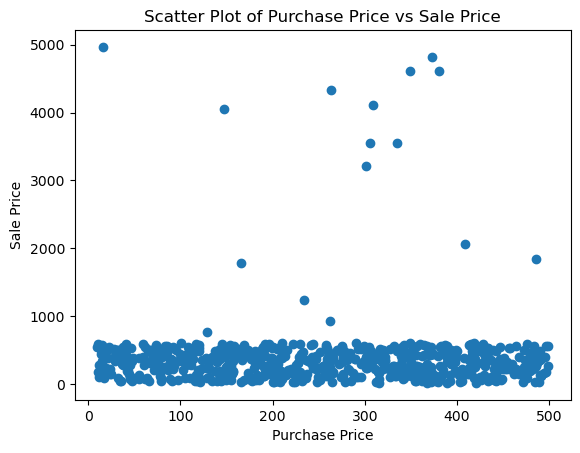

In [18]:
plt.scatter(df['Purchase_Price'], df['Sale_Price'])
plt.title('Scatter Plot of Purchase Price vs Sale Price')
plt.xlabel('Purchase Price')
plt.ylabel('Sale Price')
plt.show()

Question 7: Generate a heatmap to show the correlation between all numeric variables in the dataset. Which variables are most strongly correlated?

In [19]:
correlation_matrix = summary.corr()

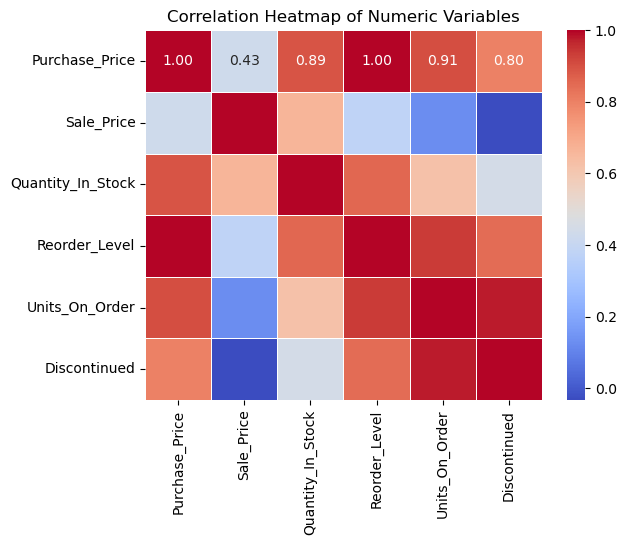

In [20]:

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

3. Handling Missing Data and Outliers 

Question 8: Impute the missing values in the 'Purchase_Price' and 'Sale_Price' columns using appropriate techniques (e.g., mean, median). Justify your choice of imputation method.

In [29]:
df['Purchase_Price'].fillna(df['Purchase_Price'].mean(), inplace=True)
df['Sale_Price'].fillna(df['Sale_Price'].median(), inplace=True)
df.head(10)



,Product_ID,Product_Name,Category,Supplier,Purchase_Price,Sale_Price,Quantity_In_Stock,Reorder_Level,Units_On_Order,Discontinued
0,P0001,Doodad,Clothing,Supplier D,339.750000,313.475,588.0,292.0,161.0,1
1,P0002,Doohickey,Clothing,Supplier C,251.924732,470.140,348.0,114.0,70.0,1
2,P0003,Thingamajig,Clothing,Supplier B,251.924732,460.100,146.0,NaN,163.0,1
3,P0004,Doohickey,Clothing,Supplier A,251.924732,124.820,66.0,13.0,NaN,0
4,P0005,Doohickey,Toys,Supplier E,228.750000,66.710,903.0,271.0,37.0,1
5,P0006,Gadget,Toys,Supplier E,401.210000,313.475,519.0,89.0,NaN,0
6,P0007,Thingamajig,Furniture,Supplier A,412.990000,230.480,NaN,215.0,136.0,1
7,P0008,Thingamajig,Electronics,Supplier A,430.210000,267.920,339.0,444.0,199.0,1
8,P0009,Thingamajig,Clothing,Supplier B,251.924732,33.220,174.0,278.0,178.0,0
9,P0010,Doohickey,Furniture,Supplier C,221.180000,166.850,899.0,447.0,34.0,1


In [23]:
Q1 = df['Sale_Price'].quantile(0.25)
Q3 = df['Sale_Price'].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df['Sale_Price'] < (Q1 - 1.5 * IQR)) | (df['Sale_Price'] > (Q3 + 1.5 * IQR)))]

Question 9: Remove the outliers in the 'Sale_Price' column using the Interquartile Range (IQR) method. Compare the summary statistics before and after removing outliers.


In [27]:
df['Sale_Price'].describe()

count    1000.000000
mean      351.716760
std       428.528007
min        15.020000
25%       196.950000
50%       313.475000
75%       419.195000
max      4967.800000
Name: Sale_Price, dtype: float64

In [28]:
df_no_outliers['Sale_Price'].describe()

count    984.000000
mean     306.164289
std      152.726564
min       15.020000
25%      193.500000
50%      313.475000
75%      410.512500
max      599.740000
Name: Sale_Price, dtype: float64

4. Advanced Data Visualization and Insights 

Question 10: Create a pair plot for the top 5 numeric columns in the dataset. What patterns or trends can you identify from the pair plot?

c:\Users\Miruthulasri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Miruthulasri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Miruthulasri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Miruthulasri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

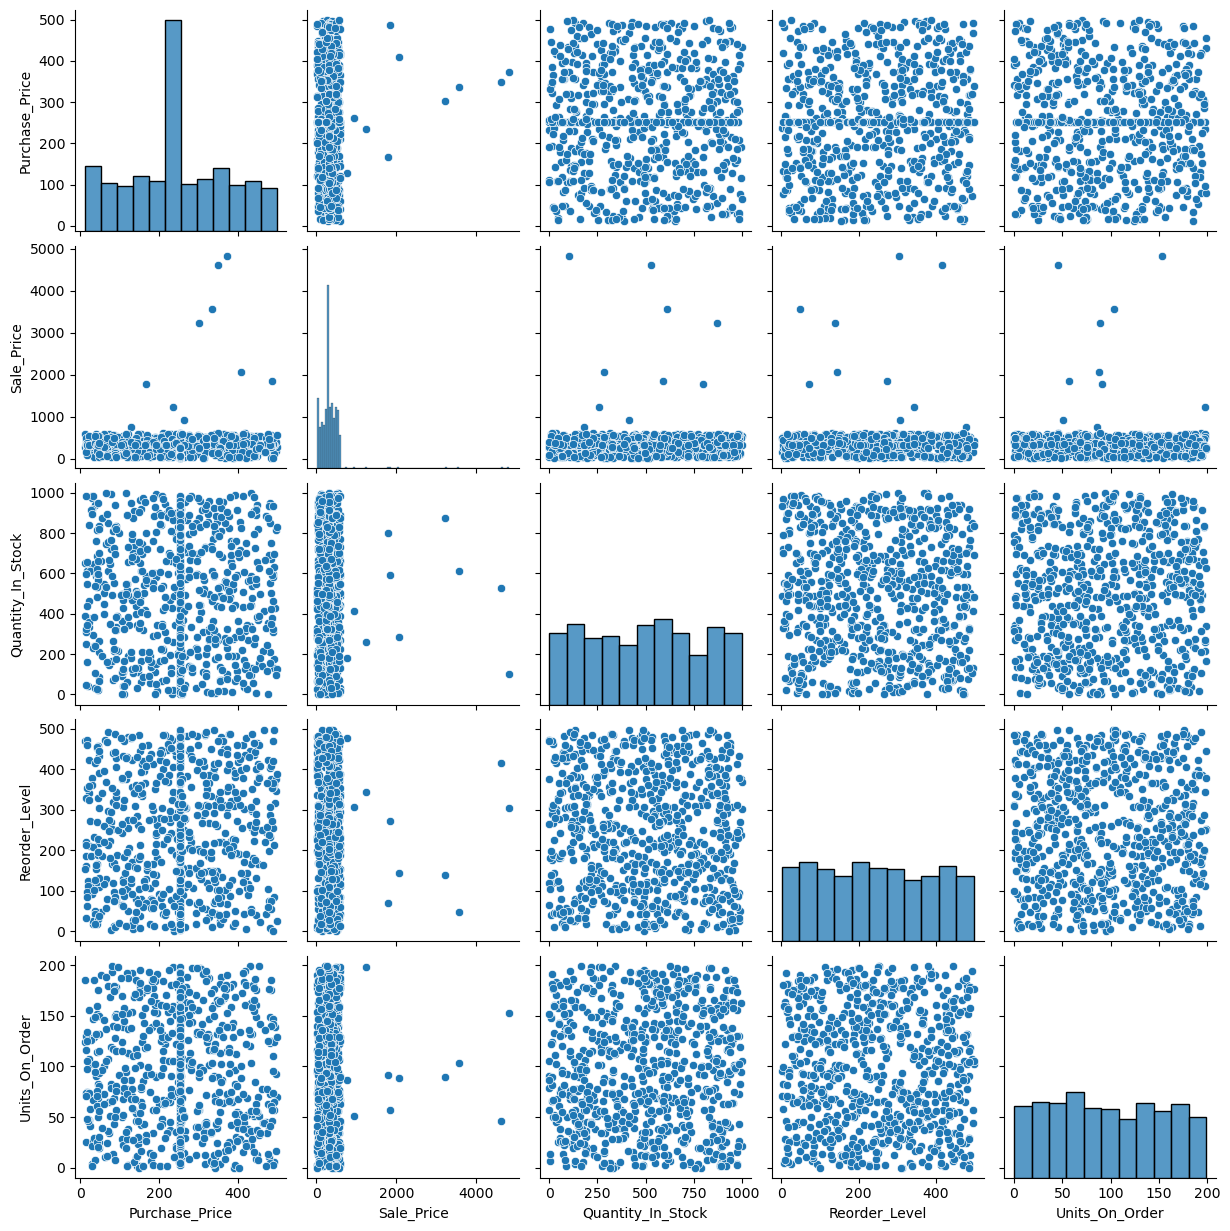

In [31]:
num_col = df.select_dtypes(include=['float64', 'int64']).columns[:5]
sns.pairplot(df[num_col].dropna())
plt.show()

Question 11: Generate a bar plot showing the average 'Sale_Price' for each 'Category' in the dataset. What conclusions can you draw about the pricing strategies across different categories?

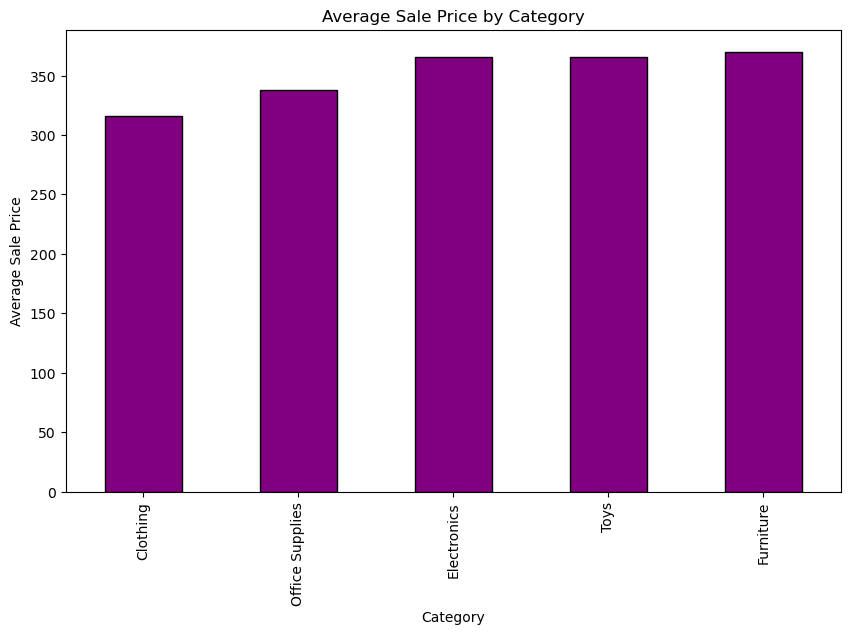

In [33]:
plt.figure(figsize=(10, 6))
avg_sales_perCat = df.groupby('Category')['Sale_Price'].mean().sort_values()
avg_sales_perCat.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Average Sale Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Sale Price')
#plt.grid(True)
plt.show()

Question 12: Perform a group-by operation to find the total 'Quantity_In_Stock' for each 'Supplier'. Visualize this data using a bar chart and discuss any significant findings.

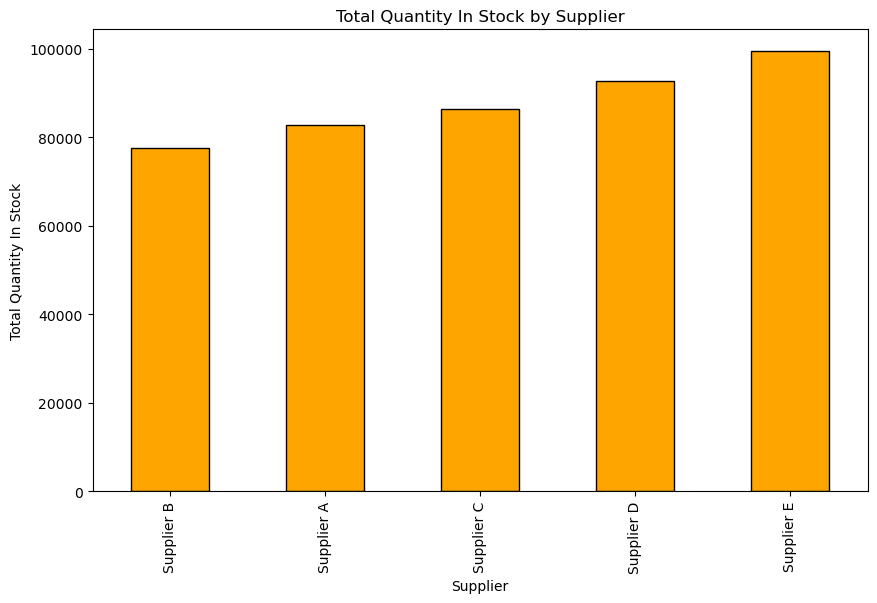

In [34]:
totalQuant_perSupplier = df.groupby('Supplier')['Quantity_In_Stock'].sum().sort_values()
totalQuant_perSupplier.plot(kind='bar', color='orange', edgecolor='black', figsize=(10, 6))
plt.title('Total Quantity In Stock by Supplier')
plt.xlabel('Supplier')
plt.ylabel('Total Quantity In Stock')
plt.show()